In [12]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

data = pd.read_csv(r'C:\Users\cory.loch\Documents\MATLAB\UFC ML Project\Kaggle UFC DataSet\ufc-master.csv')
data.info

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method DataFrame.info of               R_fighter         B_fighter  R_odds  B_odds        R_ev  \
0      Alistair Overeem  Alexander Volkov     150    -182  150.000000   
1        Cory Sandhagen     Frankie Edgar    -400     300   25.000000   
2     Alexandre Pantoja        Manel Kape    -125     100   80.000000   
3        Diego Ferreira    Beneil Dariush    -125     105   80.000000   
4       Michael Johnson        Clay Guida    -225     175   44.444444   
...                 ...               ...     ...     ...         ...   
4561       Duane Ludwig     Darren Elkins    -155     135   64.516129   
4562        John Howard    Daniel Roberts    -210     175   47.619048   
4563     Brendan Schaub     Chase Gormley    -260     220   38.461538   
4564        Mike Pierce     Julio Paulino    -420     335   23.809524   
4565       Eric Schafer       Jason Brilz     140    -160  140.000000   

            B_ev       date                   location country Winner  ...  \
0      54.945

In [4]:
data.describe(include=['O'])

,R_fighter,B_fighter,date,location,country,Winner,weight_class,gender,B_Stance,R_Stance,B_match_weightclass_rank,R_match_weightclass_rank,better_rank,finish,finish_details,finish_round_time
count,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,812,1233,4556,4118,2024,4099
unique,1286,1513,399,145,28,2,13,2,5,4,25,26,3,7,33,293
top,Donald Cerrone,Charles Oliveira,11/19/2016,"Las Vegas, Nevada, USA",USA,Red,Lightweight,MALE,Orthodox,Orthodox,9,0,neither,U-DEC,Punch,5:00
freq,23,18,24,973,2450,2674,815,4114,3439,3482,68,121,3289,1565,489,2054


In [5]:
data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
4561,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4562,John Howard,Daniel Roberts,-210,175,47.619048,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4563,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4564,Mike Pierce,Julio Paulino,-420,335,23.809524,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,10.0,0.0,0.60,0.0,0.0,0.0,6.0,0.0,0.0,0.0
4565,Eric Schafer,Jason Brilz,140,-160,140.000000,62.5,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,3.0,6.0,0.66,0.5,1.0,1.0,1.0,6.0,1.0,1.0


In [7]:
data.fillna(value=0,inplace=True)

In [8]:
data.tail()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
4561,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4562,John Howard,Daniel Roberts,-210,175,47.619048,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,1.0,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4563,Brendan Schaub,Chase Gormley,-260,220,38.461538,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4564,Mike Pierce,Julio Paulino,-420,335,23.809524,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,10.0,0.0,0.60,0.0,0.0,0.0,6.0,0.0,0.0,0.0
4565,Eric Schafer,Jason Brilz,140,-160,140.000000,62.5,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,3.0,6.0,0.66,0.5,1.0,1.0,1.0,6.0,1.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

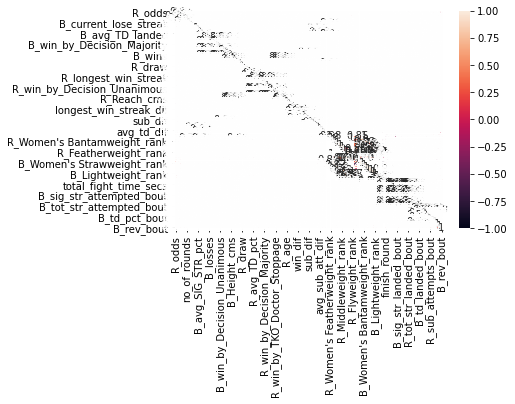

In [16]:
corrMatrix = data.corr(data.B)
sns.heatmap(corrMatrix, annot=True)
plt.show

In [1]:
 corrmat = data.corr()
 f, ax = plt.subplots(figsize=(12, 9))
 sns.heatmap(corrmat, vmax=.8, square=True);

NameError: name 'data' is not defined

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import request
